In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

import sys
sys.path.append('../simulation/models')
import gaussian_2d as gp2d

In [193]:
mu_y = 0.5 # 平均値
sigma = 0.1  # ノイズの分散
kernel = gp2d.RBF(alpha=0.3, beta=0.1)  # カーネル関数
model = gp2d.GP2D(mu_y, sigma, kernel)  # GPモデルのインスタンスを生成

# 学習
x1 = np.array([[0.2, 0.2]])
model.append(x1, 1)
model.append(x1, 1)
model.append(x1, 0)

x2 = np.array([[0.8, 0.8]])
model.append(x2, 0)
model.append(x2, 0)
model.append(x2, 0)

x3 = np.array([[0.5, 0.5]])
model.append(x3, 1)
model.append(x3, 1)
model.append(x3, 1)

x4 = np.array([[0.3, 0.3]])
model.append(x4, 0)
model.append(x4, 0)

# 予測
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x, y)
xdist = np.c_[xx.reshape(-1), yy.reshape(-1)] 
d = model.dist(xdist)

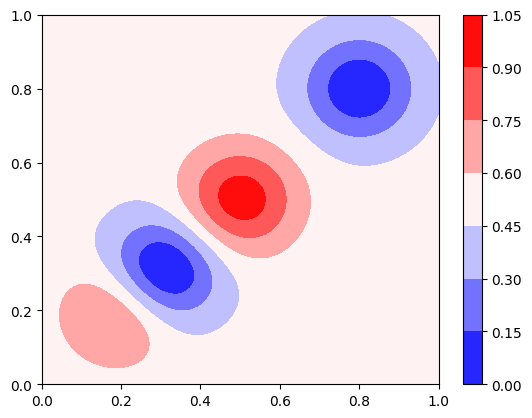

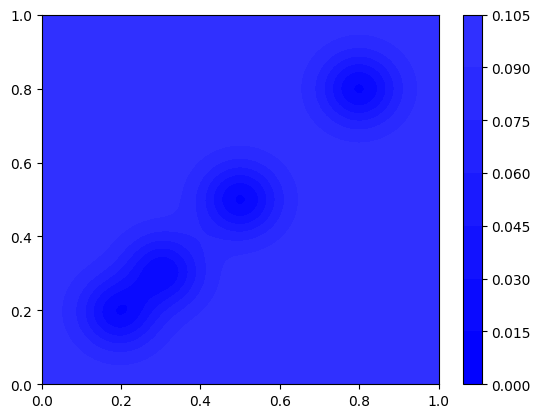

In [194]:
# plot
Z = d.mean().reshape(100,100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z, cmap="bwr", vmin=0, vmax=1)
plt.colorbar()
plt.show()

Z = d.var().reshape(100,100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z, cmap="bwr", vmin=0, vmax=1)
plt.colorbar()
plt.show()



$$
f(\mathbf{x}; \boldsymbol{\mu}, \Sigma) = 0.8 \times \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\top \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})\right)
$$


$$
\mathbf{x} \sim \mathcal{N}(\boldsymbol{\mu}, \Sigma)
$$



In [200]:
# 多変量正規分布の関数形から値を取得しベルヌーイ分布のパラメータとする
def sample_multivariate_normal(x):
    mu = np.array([0.5, 0.5])
    cov = np.array([[0.1, 0],
                [0, 0.1]])
    inv_cov = np.linalg.inv(cov)

    y = 0.8 * (np.exp(-(1/2) * (x - mu).T @ inv_cov @ (x - mu)))
    # return y
    return st.bernoulli(y).rvs()

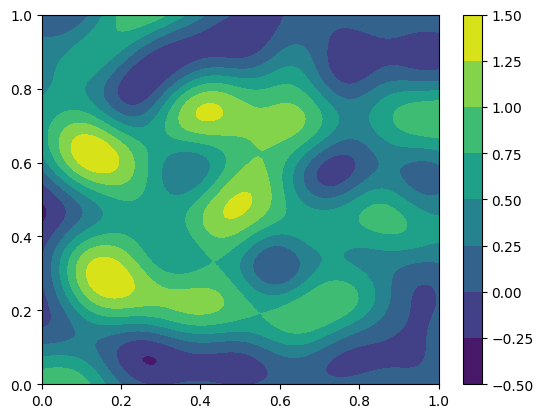

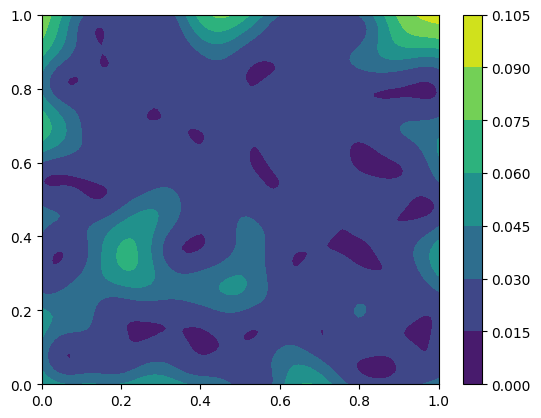

In [218]:
# GP TS
model = gp2d.GP2D(mu_y, sigma, kernel)  # GPモデルのインスタンスを生成

train = []
reward = []
# 学習
import random
n_play = 100

for _ in range(n_play):
    
    # 簡潔に
    ###
    x = np.random.rand(100)
    y = np.random.rand(100)
    xx, yy = np.meshgrid(x, y)
    xdist = np.c_[xx.reshape(-1), yy.reshape(-1)] 
    d = model.dist(xdist)
    ###
   
    s = d.rvs()
    idx = np.argmax(s)
    xy = sample[idx]
    r = sample_multivariate_normal(xy)
    
    model.append(xy[:,None].T, r)
    train.append(xy)
    reward.append(r)


x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x, y)
xdist = np.c_[xx.reshape(-1), yy.reshape(-1)] 
d = model.dist(xdist)

# plot mean
Z = d.mean().reshape(100,100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

# plot var
Z = d.var().reshape(100,100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

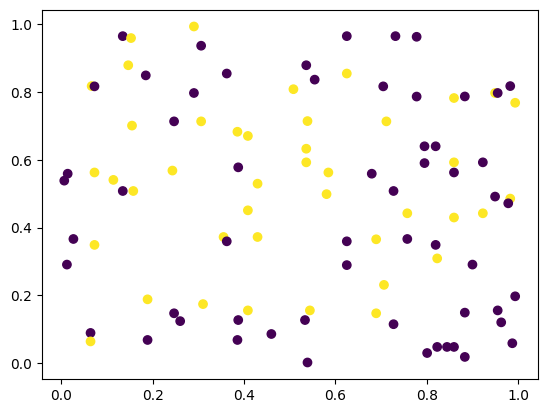

total reward = 42


In [219]:
d = np.array(train)
plt.scatter(d[:, 0], d[:, 1], c=reward)
plt.show()
print(f'total reward = {sum(reward)}')

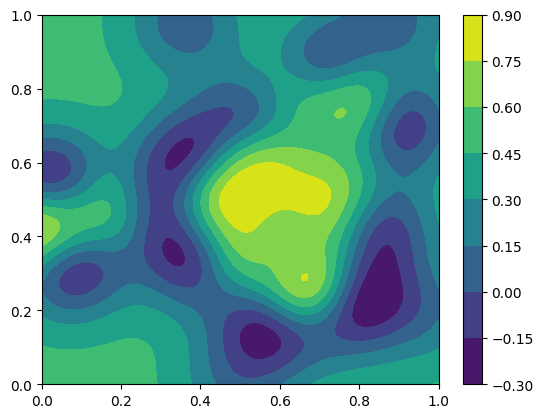

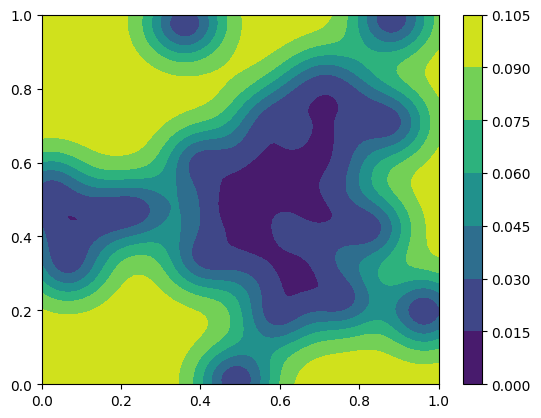

In [220]:
# GP UCB
model = gp2d.GP2D(mu_y, sigma, kernel)  # GPモデルのインスタンスを生成

train = []
reward = []
# 学習
import random
n_play = 100

for _ in range(n_play):
    
    # 簡潔に
    ###
    x = np.random.rand(100)
    y = np.random.rand(100)
    xx, yy = np.meshgrid(x, y)
    xdist = np.c_[xx.reshape(-1), yy.reshape(-1)] 
    d = model.dist(xdist)
    ###

    xy = xdist[np.argmax(d.isf(0.05))]
    r = sample_multivariate_normal(xy)
    
    model.append(xy[:,None].T, r)
    train.append(xy)
    reward.append(r)


x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x, y)
xdist = np.c_[xx.reshape(-1), yy.reshape(-1)] 
d = model.dist(xdist)

# plot mean
Z = d.mean().reshape(100,100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

# plot var
Z = d.var().reshape(100,100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

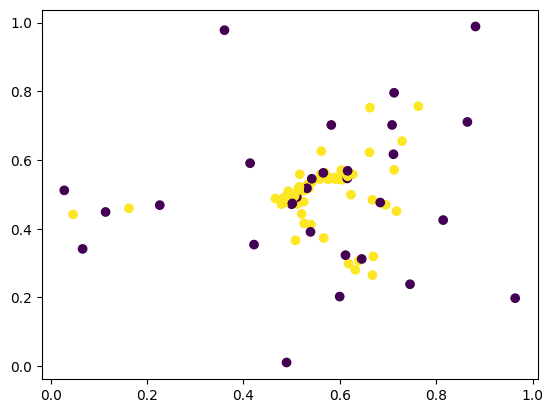

total reward = 69


In [222]:
d = np.array(train)
plt.scatter(d[:, 0], d[:, 1], c=reward)
plt.show()
print(f'total reward = {sum(reward)}')

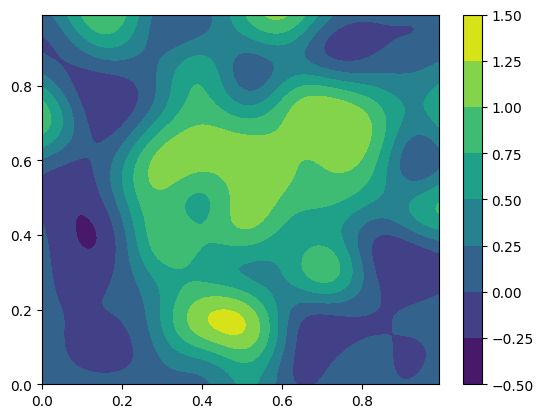

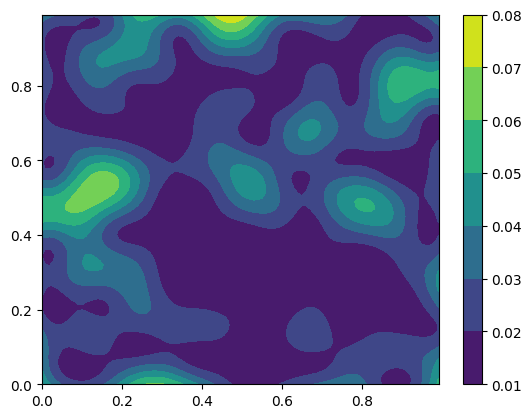

In [211]:
model = gp2d.GP2D(mu_y, sigma, kernel)  # GPモデルのインスタンスを生成

# 学習
import random
data_numbers = 100
data_x = np.random.rand(data_numbers, 2)

# ランダムな箇所に確率的に値を与える
for d in data_x:
    y = sample_multivariate_normal(d)
    model.append(d[:,None].T, y)


x = np.linspace(0, 1, 100, endpoint=False)
y = np.linspace(0, 1, 100, endpoint=False)
xx, yy = np.meshgrid(x, y)
xdist = np.c_[xx.reshape(-1), yy.reshape(-1)] 
d = model.dist(xdist)

# plot mean
Z = d.mean().reshape(100,100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

# plot var
Z = d.var().reshape(100,100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()